<a href="https://colab.research.google.com/github/Siddha-Regilla/Data-Science-Classroom-notebooks/blob/main/12.%20EDA_06_03_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
#Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations
#from mlxtend.frequent_patterns import apriori,association_rules #Association Rules libraries
#from mlxtend.preprocessing import TransactionEncoder #Association Rules libraries
import scipy
import warnings

In [131]:
#Importing functions from the above library
from scipy import stats
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler # for normalization
from sklearn.preprocessing import StandardScaler # for standardization
warnings.filterwarnings('ignore')

upload dataset - data_clean

In [83]:
#Read the dataset
data1 = pd.read_csv("data_clean.csv")

In [84]:
pd.set_option('display.min_rows', None )
data1

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
5,6,28.0,NaN,14.9,66,5,6,2010,66,C
6,7,23.0,299.0,8.6,65,5,7,2010,65,PS
7,8,19.0,99.0,13.8,59,5,8,2010,59,C
8,9,8.0,19.0,20.1,61,5,9,2010,61,PS
9,10,NaN,194.0,8.6,69,5,10,2010,69,S


Understanding the dataset

In [85]:
#No. of rows and columns
type(data1)
data1.shape

(158, 10)

In [86]:
#Data types within the dataset
data1.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [87]:
#To understand the no. of null values if present in the dataset
#Ozone, Solar.R and Weather have null values
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [88]:
#Dropping the 1st un-named column at the 0th index indicating the serial numbers and storing it in a new variable
data2=data1.iloc[:,1:]
data2

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S
5,28.0,NaN,14.9,66,5,6,2010,66,C
6,23.0,299.0,8.6,65,5,7,2010,65,PS
7,19.0,99.0,13.8,59,5,8,2010,59,C
8,8.0,19.0,20.1,61,5,9,2010,61,PS
9,NaN,194.0,8.6,69,5,10,2010,69,S


In [89]:
#Creating a new variable to treat the dataset - removing null values, renaming columns, etc. This helps preserve the original dataset
data=data2.copy()
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S
5,28.0,NaN,14.9,66,5,6,2010,66,C
6,23.0,299.0,8.6,65,5,7,2010,65,PS
7,19.0,99.0,13.8,59,5,8,2010,59,C
8,8.0,19.0,20.1,61,5,9,2010,61,PS
9,NaN,194.0,8.6,69,5,10,2010,69,S


In [90]:
pd.set_option("display.max_rows", None)
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S
5,28.0,NaN,14.9,66,5,6,2010,66,C
6,23.0,299.0,8.6,65,5,7,2010,65,PS
7,19.0,99.0,13.8,59,5,8,2010,59,C
8,8.0,19.0,20.1,61,5,9,2010,61,PS
9,NaN,194.0,8.6,69,5,10,2010,69,S


In [91]:
# We are converting the data type. As we observed while using the dtypes function, Temp C is object data. But we need to have temp to be numeric
data['Temp C']=pd.to_numeric(data['Temp C'],errors='coerce')
data.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C     float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [92]:
# Similarly we are converting the weather column from object to category and wind from float to int
data['Weather']=data['Weather'].astype('category')
data['Wind']=data['Wind'].astype('int64')
data.dtypes

Ozone       float64
Solar.R     float64
Wind          int64
Temp C      float64
Month        object
Day           int64
Year          int64
Temp          int64
Weather    category
dtype: object

In [93]:
# To check for any duplicates in the dataset
data[data.duplicated()].shape

(1, 9)

In [94]:
# This shows which is the duplicated record
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,14.0,191.0,14,75.0,9,28,2010,75,S


In [95]:
# We are dropping the duplicated record and saving the new dataset in a new variable
data_cleaned1=data.drop_duplicates()

In [96]:
# Checking the size of the new data set
data_cleaned1.shape

(157, 9)

In [97]:
# When we check the features of the dataset, we observe that Temp C and Temp are both same and carry the same values.
# Therefore, we are dropping the duplicated column - Temp C
data_cleaned2=data_cleaned1.drop('Temp C',axis=1)  # Everytime we drop columns we have to mention axis = 1
data_cleaned2

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7,5,1,2010,67,S
1,36.0,118.0,8,5,2,2010,72,C
2,12.0,149.0,12,5,3,2010,74,PS
3,18.0,313.0,11,5,4,2010,62,S
4,NaN,NaN,14,5,5,2010,56,S
5,28.0,NaN,14,5,6,2010,66,C
6,23.0,299.0,8,5,7,2010,65,PS
7,19.0,99.0,13,5,8,2010,59,C
8,8.0,19.0,20,5,9,2010,61,PS
9,NaN,194.0,8,5,10,2010,69,S


<Axes: >

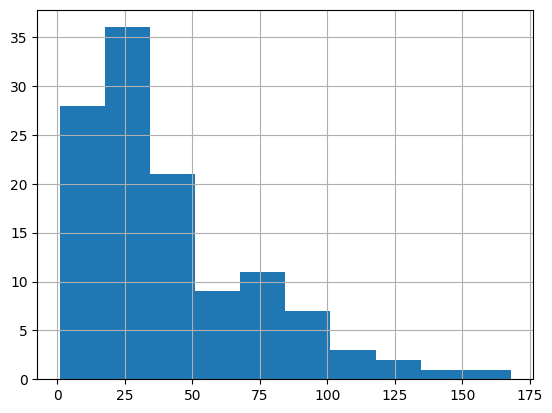

In [98]:
# We can rename columns - Sola>R to Solar and everytime we want to rename a column we need to mention axis = 1. We are saving the modified dataset into a new variable
data_cleaned3 = data_cleaned2.rename({'Solar.R': 'Solar'}, axis=1)
data_cleaned3
# As ozone has outliers, we are using histogram to spot our outliers
data_cleaned3['Ozone'].hist()

<Axes: >

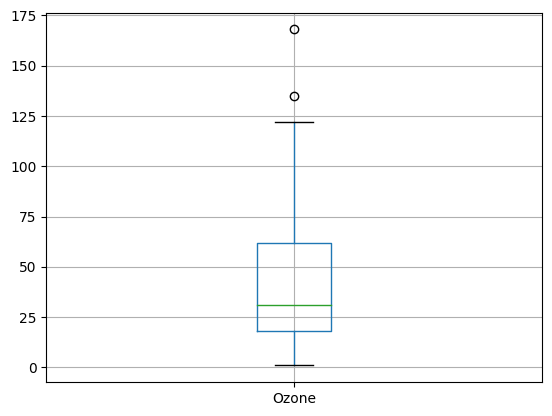

In [99]:
# We can also use Box plot to spot the outliers in the ozone column
data_cleaned3.boxplot(column=['Ozone'])

In [100]:
# Describe function is also used to identify outlier
data_cleaned3['Ozone'].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

In [101]:
# Therefore, for numerical columns we can use - histogram, box plot and discribe() to identify outliers
# For categorical columns we use - bar charts

<Axes: xlabel='Month'>

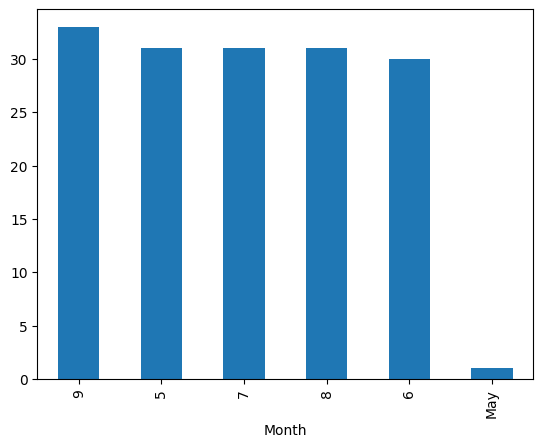

In [102]:
# Using bar chart to identify outliers in month column -
data_cleaned3['Month'].value_counts().plot.bar()

<Axes: >

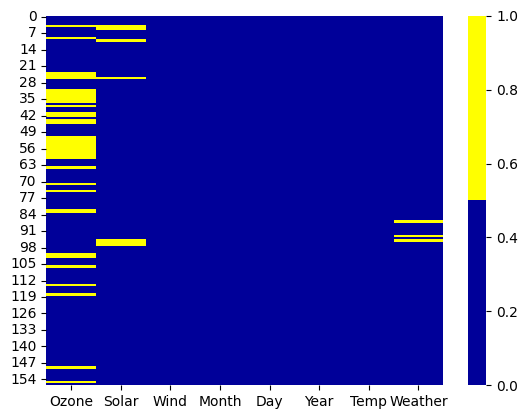

In [103]:
# For missing data we can use - isnull.sum() or isna.sum() or isnull.any(axis=1) and also create a heatmap to detecting the missing values
cols = data_cleaned3.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
# Using the above mentioned colour coding we are applying it onto the heat map denoting the null values and not null values
# isnull() gives true for null values and will colour it with yellow and false for not null value and colour it blue
sns.heatmap(data_cleaned3[cols].isnull(),
            cmap=sns.color_palette(colours))

In [104]:
# It can use to check the null values
data_cleaned3[data_cleaned3.isnull().any(axis=1)].head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
4,NaN,NaN,14,5,5,2010,56,S
5,28.0,NaN,14,5,6,2010,66,C
9,NaN,194.0,8,5,10,2010,69,S
10,7.0,NaN,6,5,11,2010,74,C
24,NaN,66.0,16,5,25,2010,57,PS


In [105]:
# Checking the count of null values we have in the dataset
data_cleaned3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       0
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [106]:
# We are performing imputation to replace the null values
# Ozone is a numeric column so we are applying mean imputation. For that we are identifying the mean of the column
mean = data_cleaned3['Ozone'].mean()
print(mean)

41.81512605042017


In [107]:
# Ozone is a numeric column so we are applying mean imputation - so all null values are replaced with mean
data_cleaned3['Ozone'] = data_cleaned3['Ozone'].fillna(mean)

In [108]:
# Rechecking the sum of null values in the ozone column
data_cleaned3['Ozone'].isnull().sum()

0

In [109]:
# Weather is a categorical column. SO we use mode imputation technique
obj_columns=data_cleaned3[['Weather']]

In [110]:
# All the null values in weather are replaced by mode value
obj_columns=obj_columns.fillna(obj_columns.mode().iloc[0])

In [111]:
# Rechecking the sum of null values in weather column
obj_columns.isnull().sum()

Weather    0
dtype: int64

In [112]:
# Similarly replace null values in solar with mean values
data_cleaned3['Solar'] = data_cleaned3['Solar'].fillna(mean)

In [113]:
data_cleaned3=data_cleaned3.drop('Weather',axis=1)
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp
0,41.000000,190.000000,7,5,1,2010,67
1,36.000000,118.000000,8,5,2,2010,72
2,12.000000,149.000000,12,5,3,2010,74
3,18.000000,313.000000,11,5,4,2010,62
4,41.815126,41.815126,14,5,5,2010,56
5,28.000000,41.815126,14,5,6,2010,66
6,23.000000,299.000000,8,5,7,2010,65
7,19.000000,99.000000,13,5,8,2010,59
8,8.000000,19.000000,20,5,9,2010,61
9,41.815126,194.000000,8,5,10,2010,69


In [114]:
data_cleaned3 = pd.concat([data_cleaned3,obj_columns], axis=1)
data_cleaned3 .isnull().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

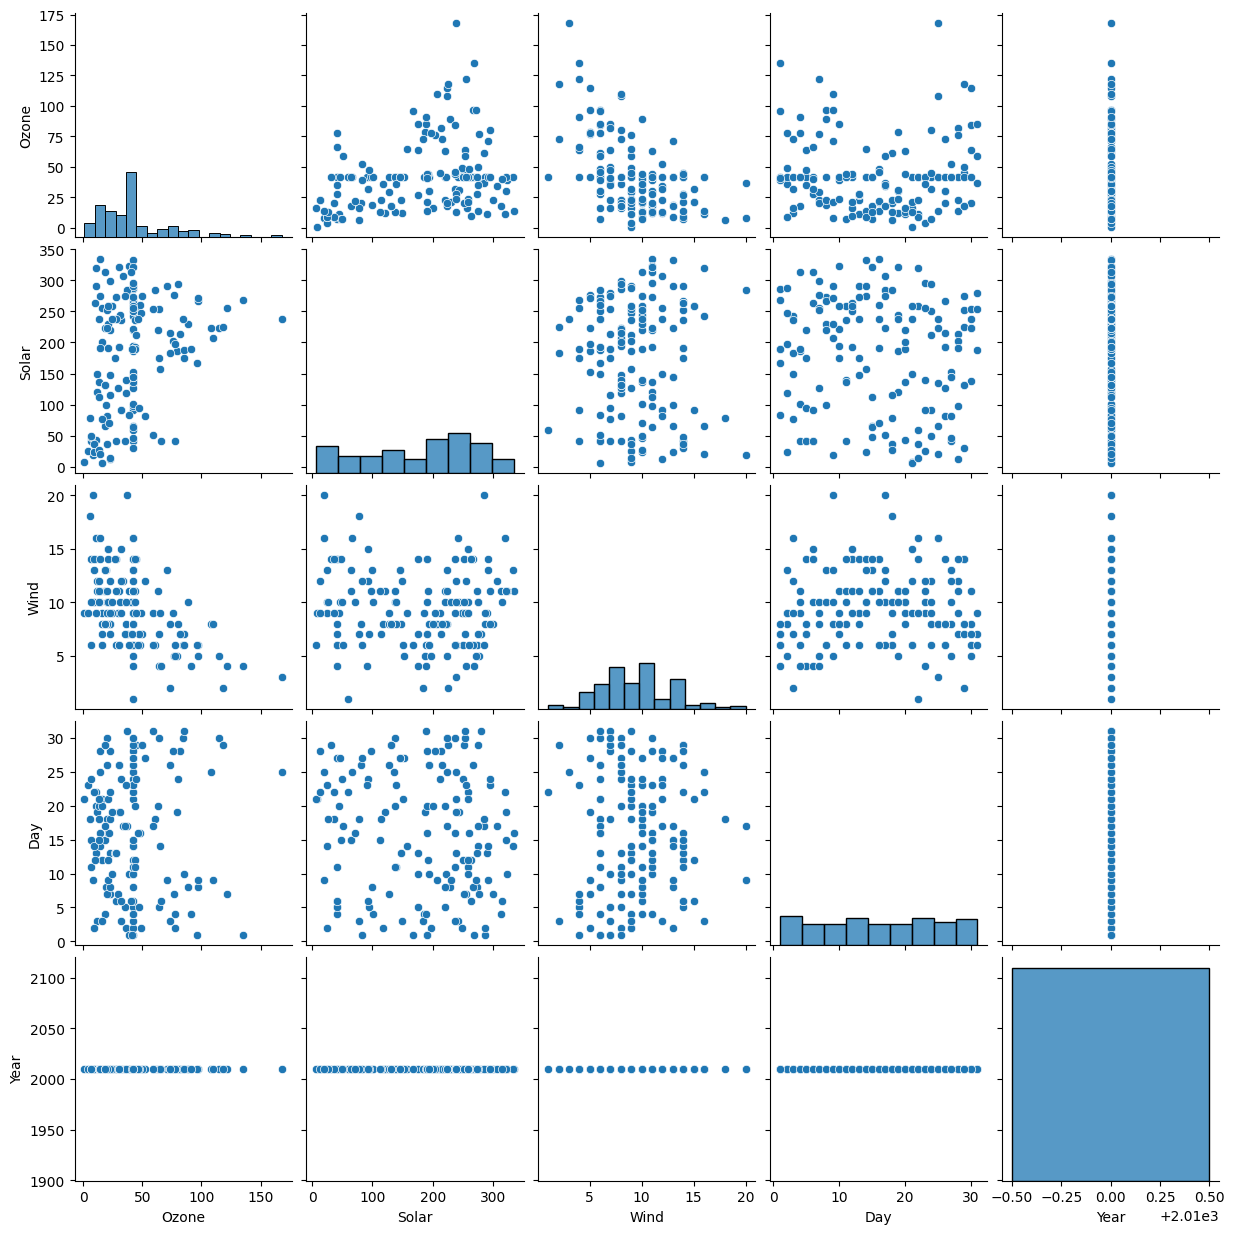

In [115]:
# As we can see there are no null values in the dataset
# So now we create our visualizations
# Create the default pairplot
sns.pairplot(data_cleaned3.iloc[:,0:6])

In [116]:
# We are dropping year column as all the values are same so it doen'st really help in understanding or predicting the data also as variance is 0
data_cleaned3 = data_cleaned3.drop('Year',axis=1)
#data_cleaned3.corr()

In [119]:
# We are now preporcessing the data using standardization or normalization for numeric columns and dummy variable transformations
#Creating dummy variable for Weather column using one hot encoder
data_cleaned4=pd.get_dummies(data,columns=['Weather'], dtype=int)  # if the dtype is not mentioned we get it as true or flase
data_cleaned4

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,41.0,190.0,7,67.0,5,1,2010,67,0,0,1
1,36.0,118.0,8,72.0,5,2,2010,72,1,0,0
2,12.0,149.0,12,74.0,5,3,2010,74,0,1,0
3,18.0,313.0,11,62.0,5,4,2010,62,0,0,1
4,NaN,NaN,14,56.0,5,5,2010,56,0,0,1
5,28.0,NaN,14,66.0,5,6,2010,66,1,0,0
6,23.0,299.0,8,65.0,5,7,2010,65,0,1,0
7,19.0,99.0,13,59.0,5,8,2010,59,1,0,0
8,8.0,19.0,20,61.0,5,9,2010,61,0,1,0
9,NaN,194.0,8,69.0,5,10,2010,69,0,0,1


In [120]:
data_cleaned4=data_cleaned4.dropna()
data_cleaned4

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,41.0,190.0,7,67.0,5,1,2010,67,0,0,1
1,36.0,118.0,8,72.0,5,2,2010,72,1,0,0
2,12.0,149.0,12,74.0,5,3,2010,74,0,1,0
3,18.0,313.0,11,62.0,5,4,2010,62,0,0,1
6,23.0,299.0,8,65.0,5,7,2010,65,0,1,0
7,19.0,99.0,13,59.0,5,8,2010,59,1,0,0
8,8.0,19.0,20,61.0,5,9,2010,61,0,1,0
11,16.0,256.0,9,69.0,5,12,2010,69,0,1,0
12,11.0,290.0,9,66.0,5,13,2010,66,0,0,1
13,14.0,274.0,10,68.0,5,14,2010,68,0,0,1


In [128]:
data_cleaned4.dtypes
data_cleaned4['Month'].value_counts()

Month
9      32
7      26
5      24
8      23
6       9
May     1
Name: count, dtype: int64

In [129]:
# When we check the datatype of the dataset, it shows that month column is of object data type.
# And the value counts function shows that there is 1 data where it is entered as 'May'
# So we convert that obs by replacing it with a numeric value
data_cleaned4 ['Month'] = data_cleaned4 ['Month'].replace(['May'],'5')
data_cleaned4

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
0,41.0,190.0,7,67.0,5,1,2010,67,0,0,1
1,36.0,118.0,8,72.0,5,2,2010,72,1,0,0
2,12.0,149.0,12,74.0,5,3,2010,74,0,1,0
3,18.0,313.0,11,62.0,5,4,2010,62,0,0,1
6,23.0,299.0,8,65.0,5,7,2010,65,0,1,0
7,19.0,99.0,13,59.0,5,8,2010,59,1,0,0
8,8.0,19.0,20,61.0,5,9,2010,61,0,1,0
11,16.0,256.0,9,69.0,5,12,2010,69,0,1,0
12,11.0,290.0,9,66.0,5,13,2010,66,0,0,1
13,14.0,274.0,10,68.0,5,14,2010,68,0,0,1


In [132]:
# Now we are preprocessing the numeric data by normalizing the data by converting the data into values between 0 - 1
array = data_cleaned4.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:5])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


[[0.24 0.56 0.28 0.25 0.  ]
 [0.21 0.34 0.33 0.38 0.  ]
 [0.07 0.43 0.56 0.43 0.  ]
 [0.1  0.94 0.5  0.12 0.  ]
 [0.13 0.89 0.33 0.2  0.  ]]


In [133]:
# Now we are preprocessing the numeric data by standardizing the data by converting the data into values of z-scores
array = data_cleaned4.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-0.02  0.06 -0.7  -1.13 -1.51 -1.71  0.   -1.13 -0.65 -0.68  1.29]
 [-0.17 -0.74 -0.42 -0.59 -1.51 -1.6   0.   -0.59  1.54 -0.68 -0.77]
 [-0.9  -0.4   0.73 -0.38 -1.51 -1.49  0.   -0.38 -0.65  1.48 -0.77]
 [-0.72  1.44  0.44 -1.66 -1.51 -1.37  0.   -1.66 -0.65 -0.68  1.29]
 [-0.57  1.28 -0.42 -1.34 -1.51 -1.03  0.   -1.34 -0.65  1.48 -0.77]]


In [ ]:
# While we have understood how to perform EDA on the data, there are multiple libraries that help automate the process.
# We will be understanding one such library called as Sweetviz

# ***Sweetviz***

In [134]:
!pip install sweetviz
import sweetviz as sv
sweet_report = sv.analyze(data1) # this analyses the data
sweet_report.show_html('weather_report.html')  # and presents it to us in the form of a html report

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 52.1 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [137]:
# Download the above report to view it

When opened the above report, it gives the following info and more -

1. No. of row, duplicates, ram, features, categorical columns, numeric columns, text

2. Details of the columns - name, missing values, distinct values, max value, quartile values, median, average, min, range, IQR, std, var, kurt, skew, sum as well as the histogram

3. When you click on the histogram we get - we understand the type of ditribution, tell us the associations, i.e., the correlation between the columns, both for numeric and categoric

4. In the dataframe summary table, there is an associations button. It gives us, correlation heat map.

For positive relation its shown in blue and negative its shown in red.
The circles indicate numeric correlation and it uses pearson correlation and squares indicate categoric correlation and it uses PPS - predictive power score

In [135]:
# Another auto EDA is pandas profiling and it is better than sweetviz

# ***Pandas Profiling***

In [136]:
!pip install ydata-profiling
!pip install markupsafe
!pip install numpy --upgrade
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import sweetviz as sv
data1 = pd.read_csv("data_clean.csv")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=524753114dffd8af2fb03b7186ccc6e15996984f4941c053cb0bf8570438f7b4
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 23.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This 

In [138]:
# This prepares the report
from ydata_profiling import ProfileReport
EDA_report= ProfileReport(data1)
EDA_report.to_file(output_file='report.html')
EDA_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]